In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# List of city names and states
cities = ['New York', 'Jacksonville', 'Dallas', 'San Antonio', 'San Diego', 'Houston', 'Phoenix', 'Philadelphia', 'Los Angeles', 'Seattle']
states = ['NY', 'FL', 'TX', 'TX', 'CA', 'TX', 'AZ', 'PA', 'CA', 'WA']

In [3]:
# Air_Qualitly = '/Users/rileychisholm/Downloads/US_AQI.csv'

In [4]:
pop = pd.read_csv('/Users/rileychisholm/Downloads/population_data.csv')

In [5]:
pop

Year          City  Population
0    1970      New York   7894862.0
1    1971      New York   7812539.7
2    1972      New York   7730217.4
3    1973      New York   7647895.1
4    1974      New York   7565572.8
..    ...           ...         ...
535  2019  Jacksonville    936828.3
536  2020  Jacksonville    949611.0
537  2021  Jacksonville    949611.0
538  2022  Jacksonville    949611.0
539  2023  Jacksonville    949611.0

[540 rows x 3 columns]

In [6]:
combined_df = pd.read_csv('/Users/rileychisholm/Downloads/Combined_Weather_Data.csv')


In [7]:
# Converts DATE to datetime
combined_df['DATE'] = pd.to_datetime(combined_df['DATE'])

In [14]:
# Adds a month column for later use
combined_df['month'] = combined_df['DATE'].dt.month

In [15]:
combined_df

STATION       DATE      AWND  EMNT  EMXT  PRCP       RHAV  \
0     USW00094728 1974-01-01  7.071176   6.0  66.0  3.81  62.407581   
1     USW00094728 1974-02-01  7.071176  11.0  62.0  1.49  62.407581   
2     USW00094728 1974-03-01  7.071176  20.0  70.0  5.76  62.407581   
3     USW00094728 1974-04-01  7.071176  28.0  89.0  3.83  62.407581   
4     USW00094728 1974-05-01  7.071176  40.0  92.0  4.30  62.407581   
...           ...        ...       ...   ...   ...   ...        ...   
5994  USW00024233 2023-08-01  7.200000  52.0  95.0  0.27  60.000000   
5995  USW00024233 2023-09-01  6.900000  46.0  87.0  3.44  68.000000   
5996  USW00024233 2023-10-01  6.700000  32.0  79.0  2.89  77.000000   
5997  USW00024233 2023-11-01  6.700000  28.0  63.0  5.79  79.000000   
5998  USW00024233 2023-12-01  7.200000  30.0  63.0  8.48  62.407581   

           RHMN       RHMX  SNOW  TAVG  TMAX  TMIN      City State  Year  \
0     43.113711  81.423491   7.8  35.2  41.3  29.0  New York    NY  1974   
1     43.113711  81.423491   9.4  31.7  38.7  24.7  New York    NY  1974   
2     43.113711  81.423491   3.2  42.0  50.1  34.0  New York    NY  1974   
3     43.113711  81.423491   0.3  55.1  65.0  45.3  New York    NY  1974   
4     43.113711  81.423491   0.0  60.9  69.4  52.4  New York    NY  1974   
...         ...        ...   ...   ...   ...   ...       ...   ...   ...   
5994  41.000000  81.000000   0.0  69.9  79.9  59.9   Seattle    WA  2023   
5995  48.000000  88.000000   0.0  62.0  70.6  53.4   Seattle    WA  2023   
5996  57.000000  92.000000   0.0  54.6  61.4  47.8   Seattle    WA  2023   
5997  63.000000  93.000000   0.0  44.9  51.0  38.7   Seattle    WA  2023   
5998  43.113711  81.423491   0.0  45.5  50.6  40.4   Seattle    WA  2023   

      Population  month  
0      7565572.8      1  
1      7565572.8      2  
2      7565572.8      3  
3      7565572.8      4  
4      7565572.8      5  
...          ...    ...  
5994    737015.0      8  
5995    737015.0      9  
5996    737015.0     10  
5997    737015.0     11  
5998    737015.0     12  

[5999 rows x 18 columns]

In [9]:
print(combined_df.info())
print(combined_df.describe())
print(combined_df.describe(include=['object']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   STATION     5999 non-null   object        
 1   DATE        5999 non-null   datetime64[ns]
 2   AWND        5999 non-null   float64       
 3   EMNT        5999 non-null   float64       
 4   EMXT        5999 non-null   float64       
 5   PRCP        5999 non-null   float64       
 6   RHAV        5999 non-null   float64       
 7   RHMN        5999 non-null   float64       
 8   RHMX        5999 non-null   float64       
 9   SNOW        5999 non-null   float64       
 10  TAVG        5999 non-null   float64       
 11  TMAX        5999 non-null   float64       
 12  TMIN        5999 non-null   float64       
 13  City        5999 non-null   object        
 14  State       5999 non-null   object        
 15  Year        5999 non-null   int64         
 16  Population  5999 non-nul

In [10]:
# Counts missing values per column
missing_values = combined_df.isnull().sum()
print(missing_values)

STATION       0
DATE          0
AWND          0
EMNT          0
EMXT          0
PRCP          0
RHAV          0
RHMN          0
RHMX          0
SNOW          0
TAVG          0
TMAX          0
TMIN          0
City          0
State         0
Year          0
Population    0
dtype: int64


In [11]:
# Function to get data sorted by city
def get_city_data(df, city_name):
    return df[df['City'] == city_name]

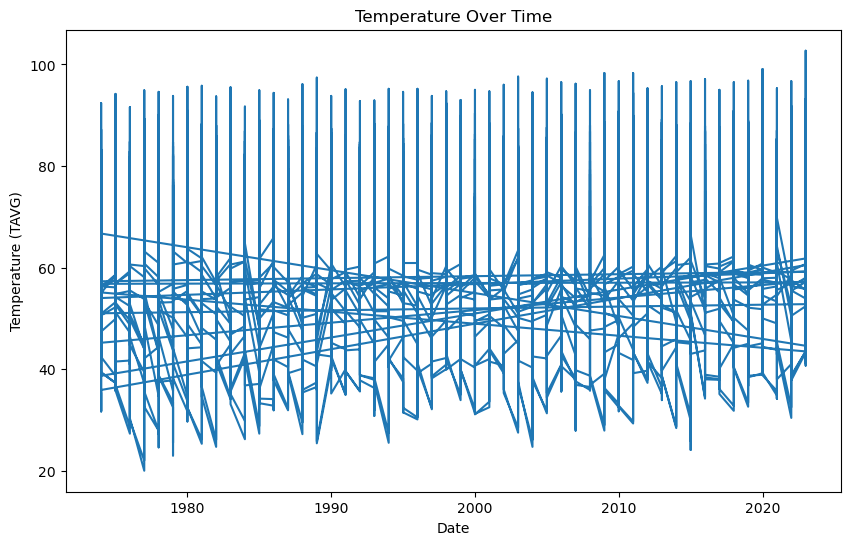

In [40]:
# NEED TO FIX THIS
plt.figure(figsize=(10, 6))
plt.plot(combined_df['Year'], combined_df['TAVG'])
plt.xlabel('Date')
plt.ylabel('Temperature (TAVG)')
plt.title('Temperature Over Time')
plt.show()

In [ ]:
# Plot to show how the cities populations have increased over time
# This will help show what cities have increased the most in the last 50 years

<Figure size 1000x600 with 0 Axes>

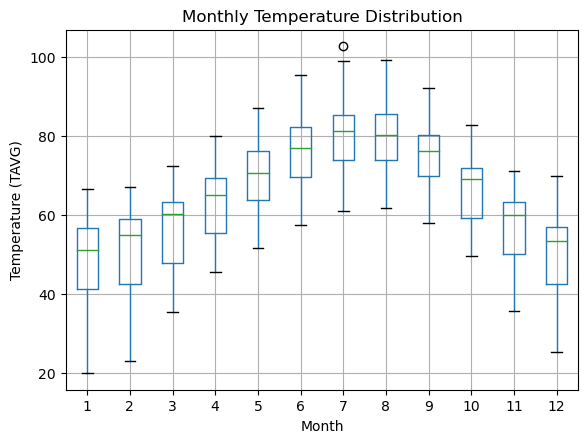

In [16]:
# Box plot
plt.figure(figsize=(10, 6))
combined_df.boxplot(column='TAVG', by='month')
plt.xlabel('Month')
plt.ylabel('Temperature (TAVG)')
plt.title('Monthly Temperature Distribution')
plt.suptitle('')
plt.show()

In [17]:
# Function to plot time series for a given city
def plot_time_series(city_name, df):
    city_df = df[df['City'] == city_name]
    city_df.set_index('DATE', inplace=True)
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=city_df['TAVG'], label='Average Temperature (TAVG)', color='blue')
    sns.lineplot(data=city_df['PRCP'], label='Precipitation (PRCP)', color='orange')
    sns.lineplot(data=city_df['RHAV'], label='Average Relative Humidity (RHAV)', color='green')
    plt.title(f'Time Series Analysis for {city_name}')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

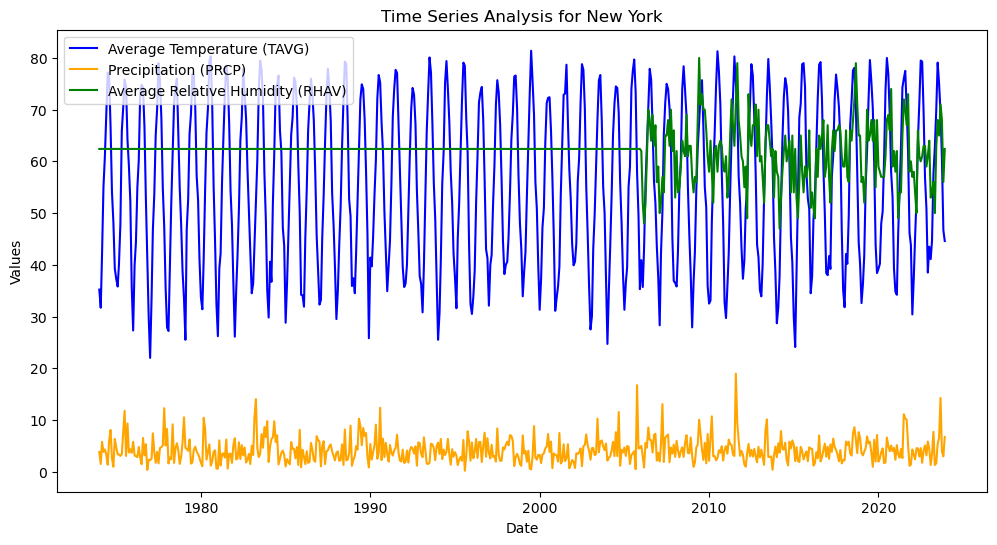

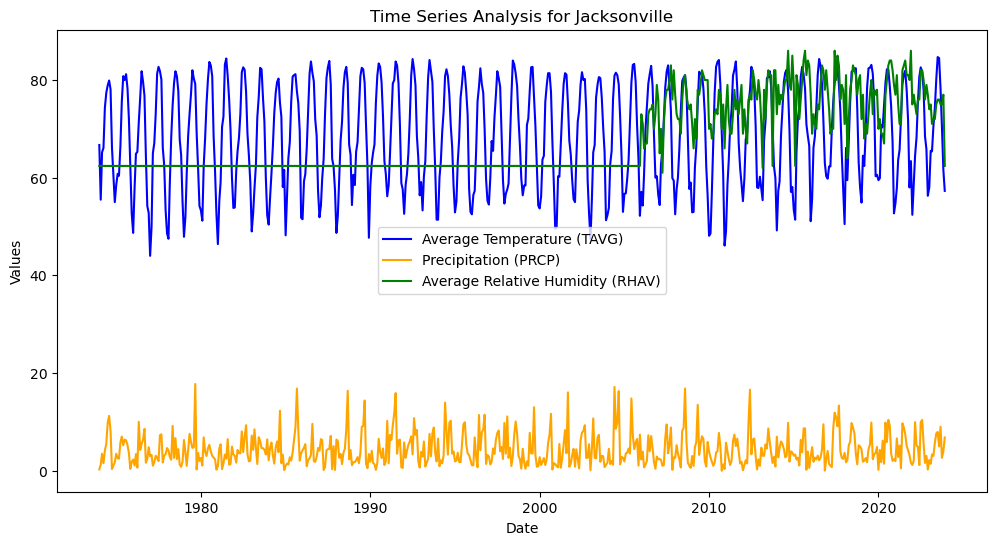

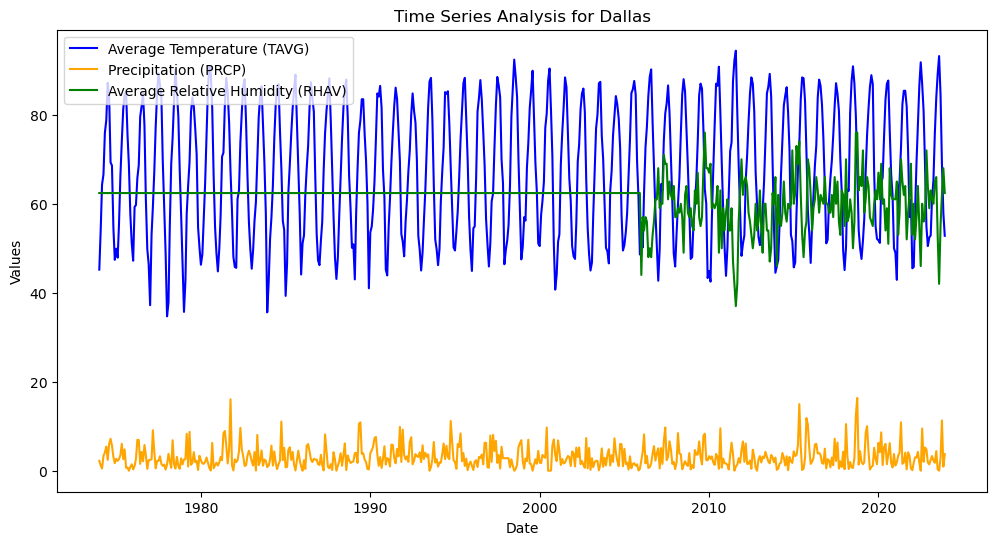

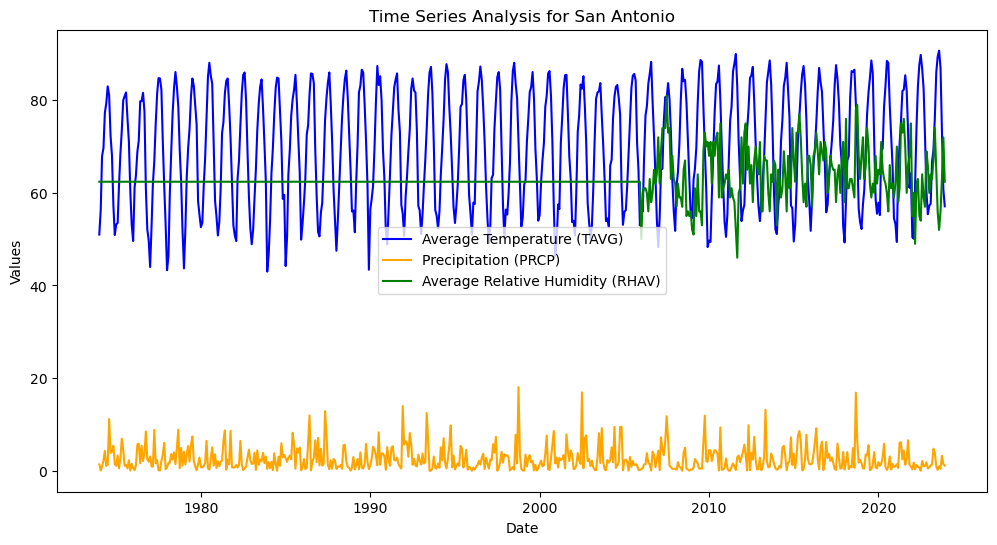

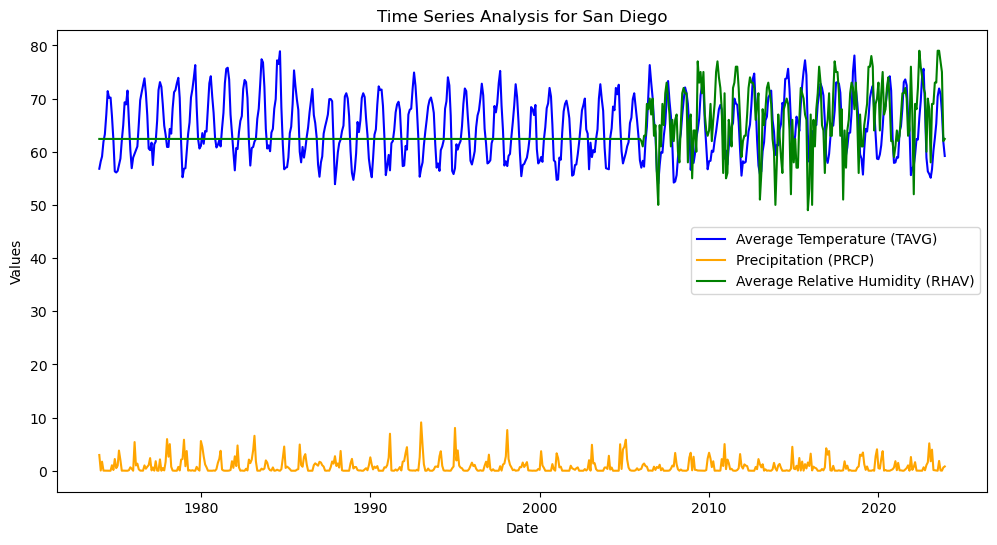

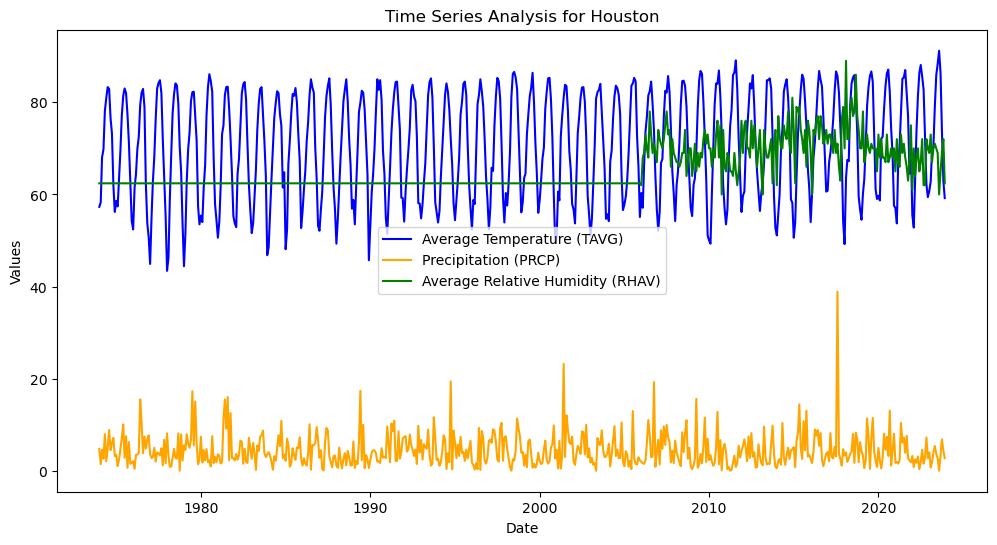

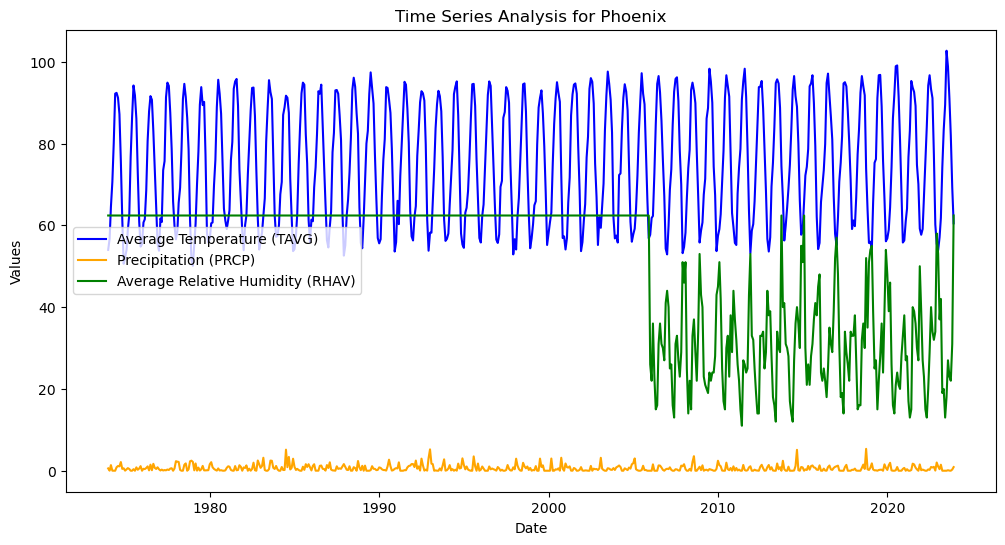

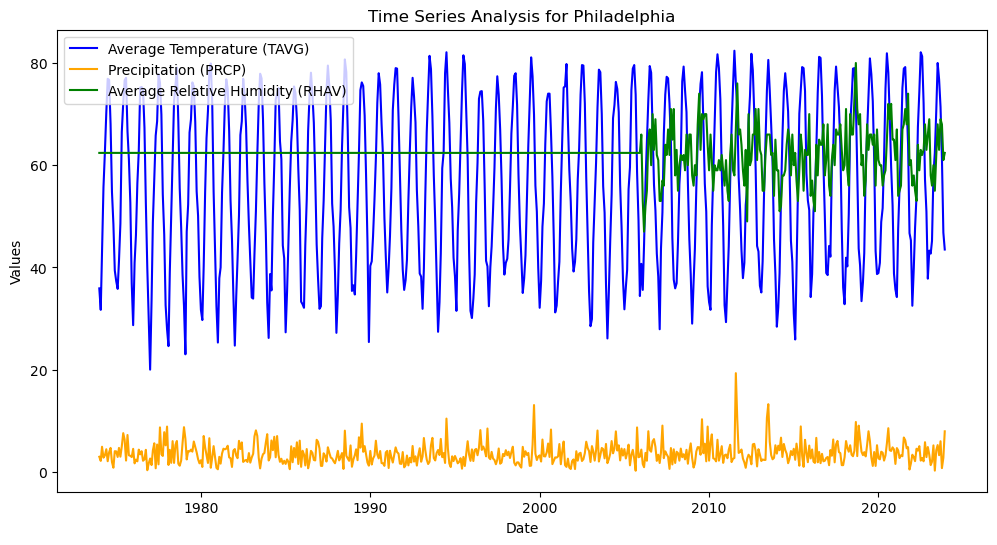

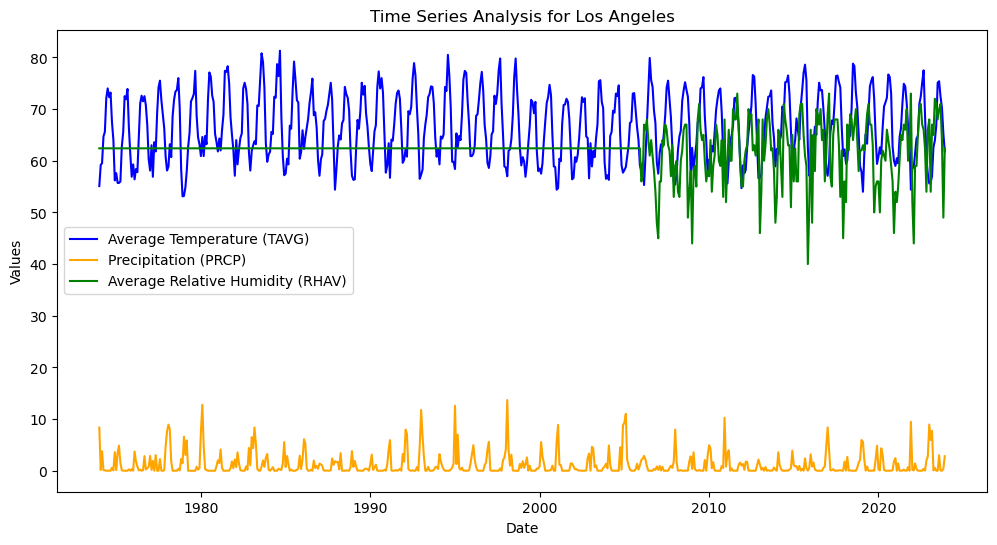

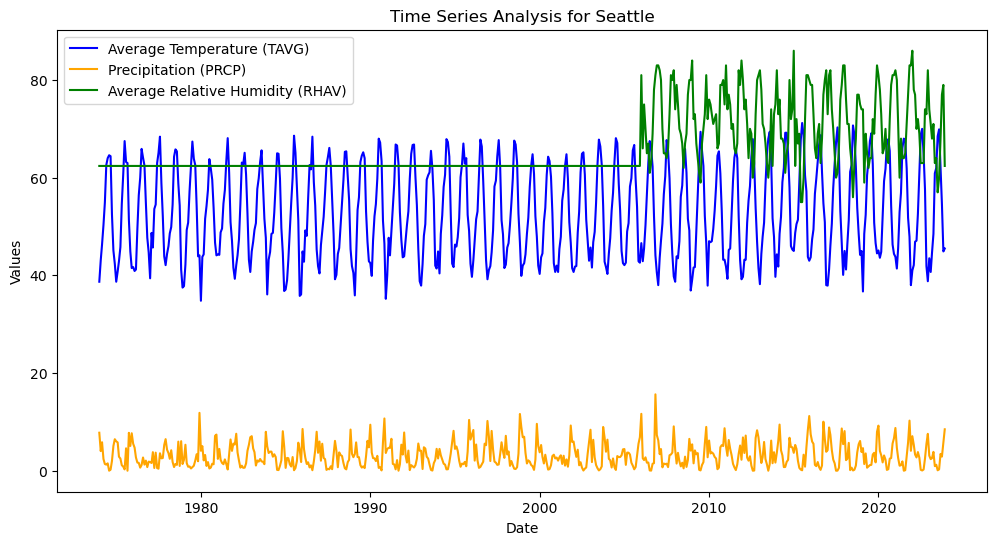

In [18]:
# Plot time series for each city
for city in cities:
    plot_time_series(city, combined_df)


In [23]:
# Function to perform linear regression analysis for one city
def linear_regression_city(city_name):
    # Filter for one city
    city_weather_df = combined_df[combined_df['City'] == city_name]

    # Aggregate monthly data to yearly data
    yearly_avg_temp = city_weather_df.groupby('Year')['TMIN'].mean().reset_index()

    # Merge with population data
    city_pop_df = pop[pop['City'] == city_name]
    city_merged_df = pd.merge(yearly_avg_temp, city_pop_df, on='Year', how='left')

    # Check for NaN values after merging and drop NaN rows if any
    city_merged_df.dropna(inplace=True)

    # Linear Regression model for temperature prediction based on urban population
    X = city_merged_df[['Population']]
    y = city_merged_df['TMIN']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and fit the model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = lr_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'\nAnalysis for {city_name}:\n')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')

    # Plot predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
    plt.title(f'Linear Regression: Predicted vs Actual Temperature for {city_name}')
    plt.xlabel('Urban Population')
    plt.ylabel('Temperature (TAVG)')
    plt.legend()
    plt.show()


Analysis for New York:

Mean Squared Error: 0.7787045940882777
R-squared: 0.04747314608971587


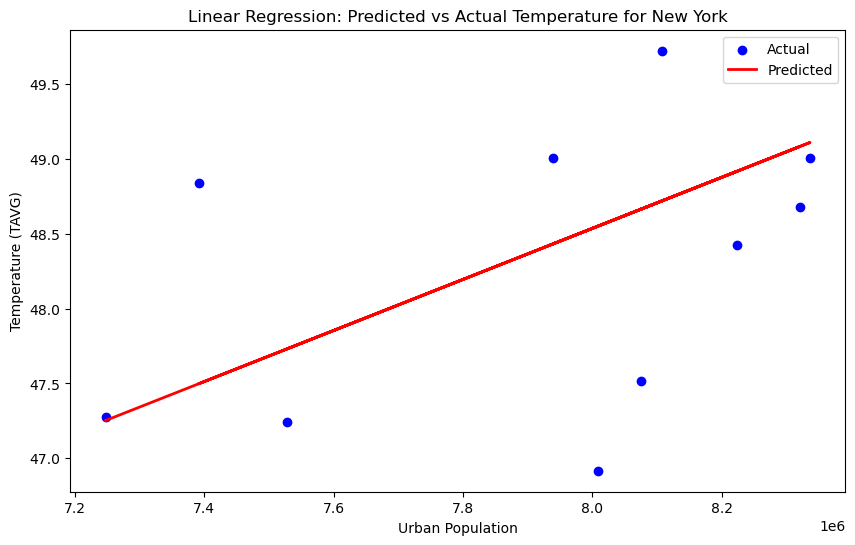


Analysis for Jacksonville:

Mean Squared Error: 1.6555767930927001
R-squared: 0.17646681087979532


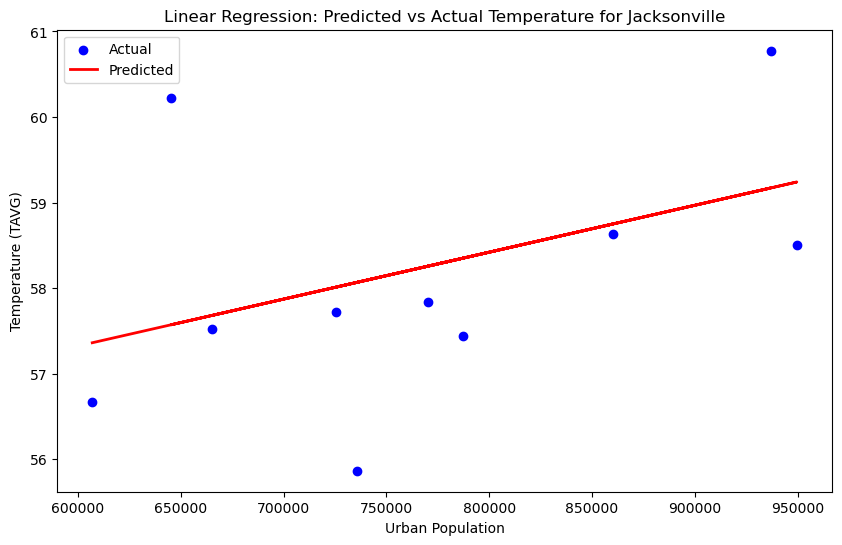


Analysis for Dallas:

Mean Squared Error: 0.98338850103126
R-squared: -0.21385070086946567


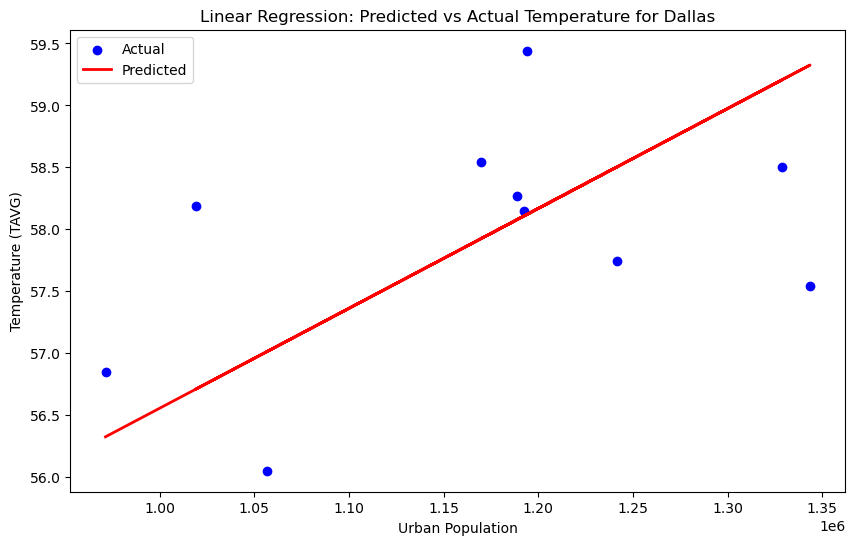


Analysis for San Antonio:

Mean Squared Error: 0.4677882508505148
R-squared: 0.33614622468745503


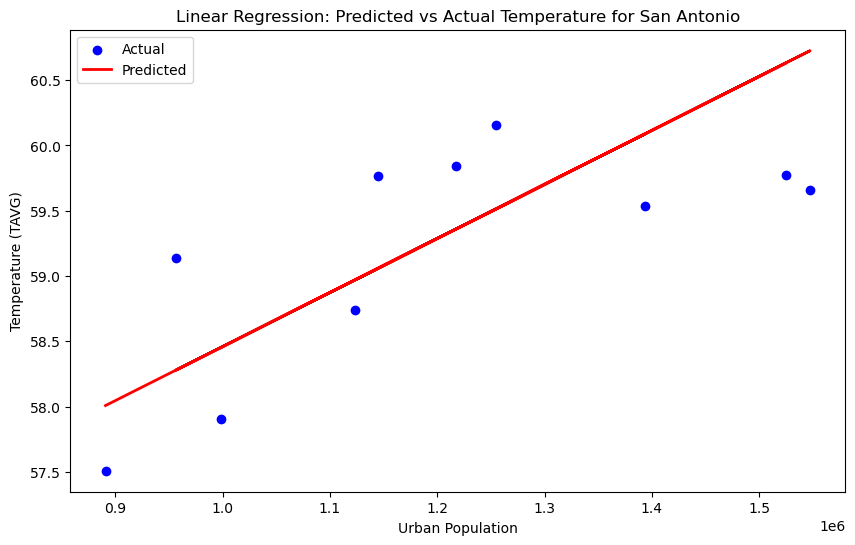


Analysis for San Diego:

Mean Squared Error: 1.7132581702722007
R-squared: -0.9679349139445186


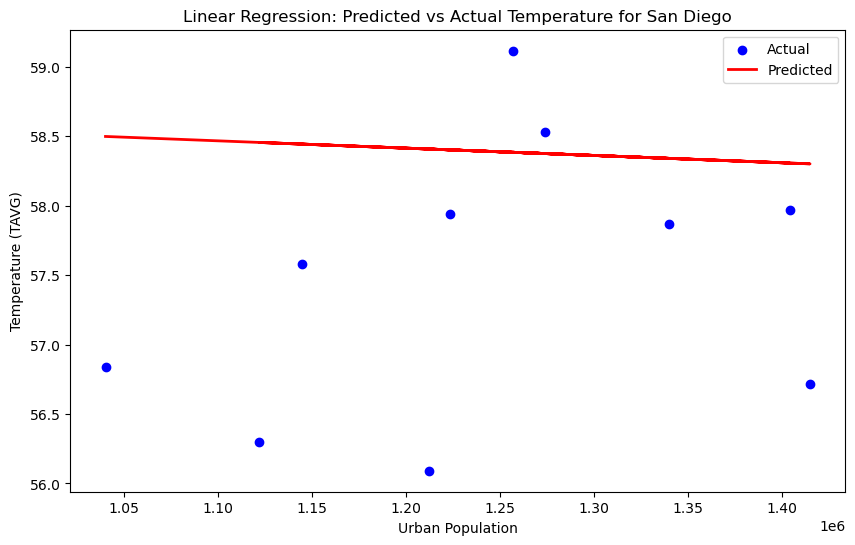


Analysis for Houston:

Mean Squared Error: 1.0122727290595417
R-squared: -0.5160150531512104


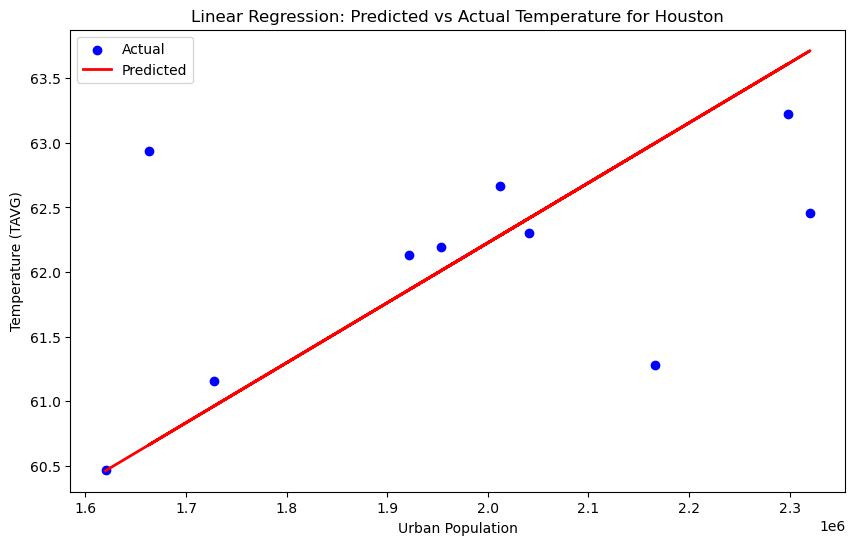


Analysis for Phoenix:

Mean Squared Error: 0.9632544674127663
R-squared: -1.5614495997857611


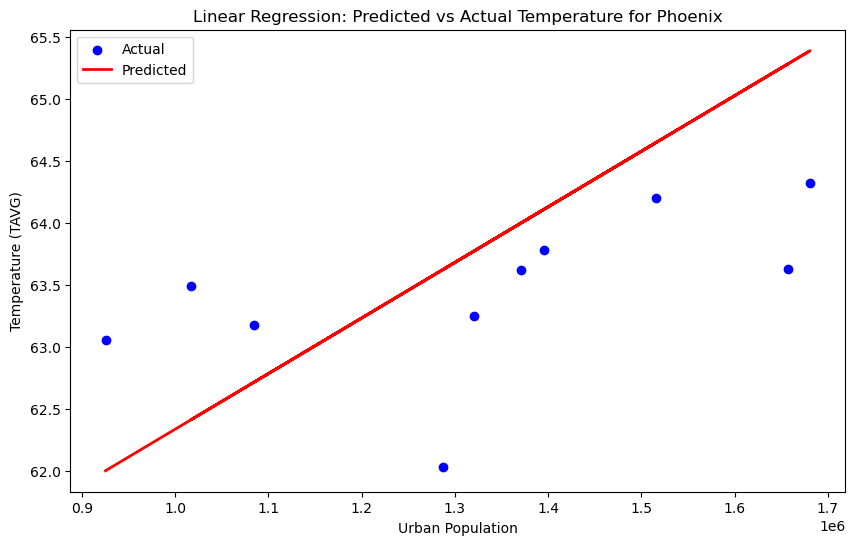


Analysis for Philadelphia:

Mean Squared Error: 1.5274069794756824
R-squared: -0.2897703712654873


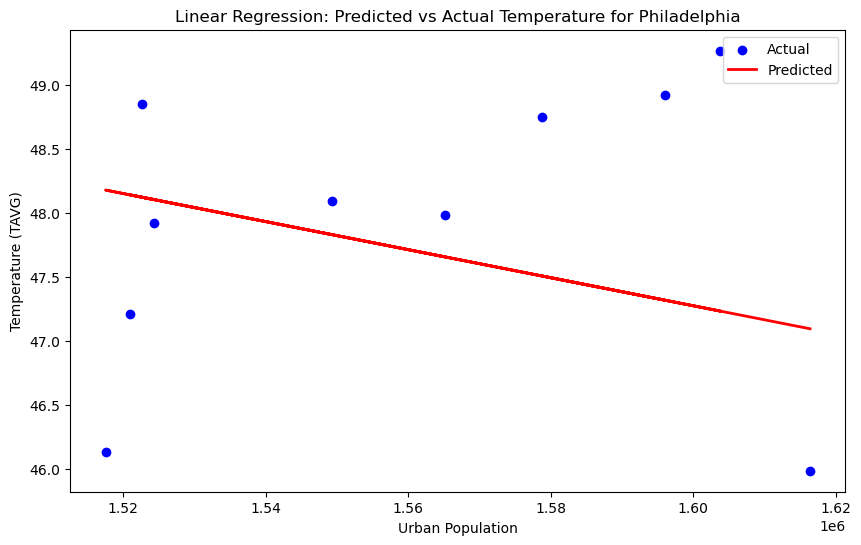


Analysis for Los Angeles:

Mean Squared Error: 1.4819367374399488
R-squared: -0.7995528095715156


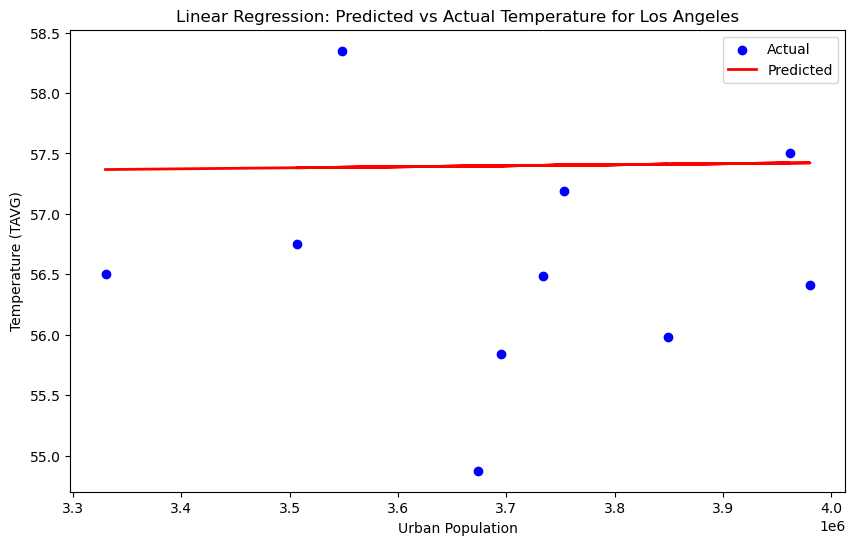


Analysis for Seattle:

Mean Squared Error: 0.5412664339155067
R-squared: 0.275011380656465


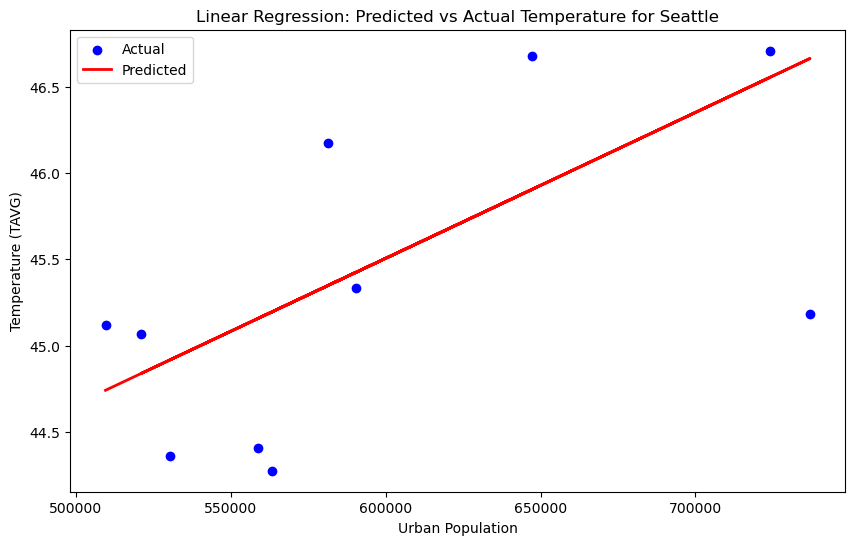

In [24]:
# Perform analysis for each city
for city in cities:
    linear_regression_city(city)

In [36]:
# Function to perform SARIMA time series analysis for one city
def sarima_city(city_name, train_ratio=0.8):
    # Filter for one city
    city_weather_df = combined_df[combined_df['City'] == city_name]
    city_weather_df.set_index('DATE', inplace=True)
    
    # Decompose the time series to show trend and seasonality if possible
    if len(city_weather_df) >= 24: 
        decomposition = seasonal_decompose(city_weather_df['TAVG'], model='additive', period=12)
        
        plt.figure(figsize=(12, 8))
        plt.subplot(411)
        plt.plot(city_weather_df['TAVG'], label='Original')
        plt.legend(loc='upper left')
        plt.subplot(412)
        plt.plot(decomposition.trend, label='Trend')
        plt.legend(loc='upper left')
        plt.subplot(413)
        plt.plot(decomposition.seasonal, label='Seasonality')
        plt.legend(loc='upper left')
        plt.subplot(414)
        plt.plot(decomposition.resid, label='Residuals')
        plt.legend(loc='upper left')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Not enough data for seasonal decomposition for {city_name}. Required: 24, Available: {len(city_weather_df)}")
    
    # Split the data into training and testing sets
    train_size = int(len(city_weather_df) * train_ratio)
    train, test = city_weather_df[:train_size], city_weather_df[train_size:]
    
    # Fit SARIMA model on training set
    model = sm.tsa.statespace.SARIMAX(train['TAVG'], 
                                      order=(5, 1, 0), 
                                      seasonal_order=(1, 1, 1, 12))
    results = model.fit()
    
    # Forecast the test set
    forecast = results.get_forecast(steps=len(test))
    forecast_values = forecast.predicted_mean
    conf_int = forecast.conf_int()

    # Plot the original, forecasted, and test values
    plt.figure(figsize=(10, 6))
    plt.plot(city_weather_df['TAVG'], label='Original')
    plt.plot(results.fittedvalues, color='red', label='Fitted')
    plt.plot(forecast_values, color='green', label='Forecast')
    plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
    plt.title(f'SARIMA Time Series Analysis for {city_name}')
    plt.xlabel('Date')
    plt.ylabel('Average Temperature (TAVG)')
    plt.legend()
    plt.show()
    
    print(f"SARIMA Model Summary for {city_name}")


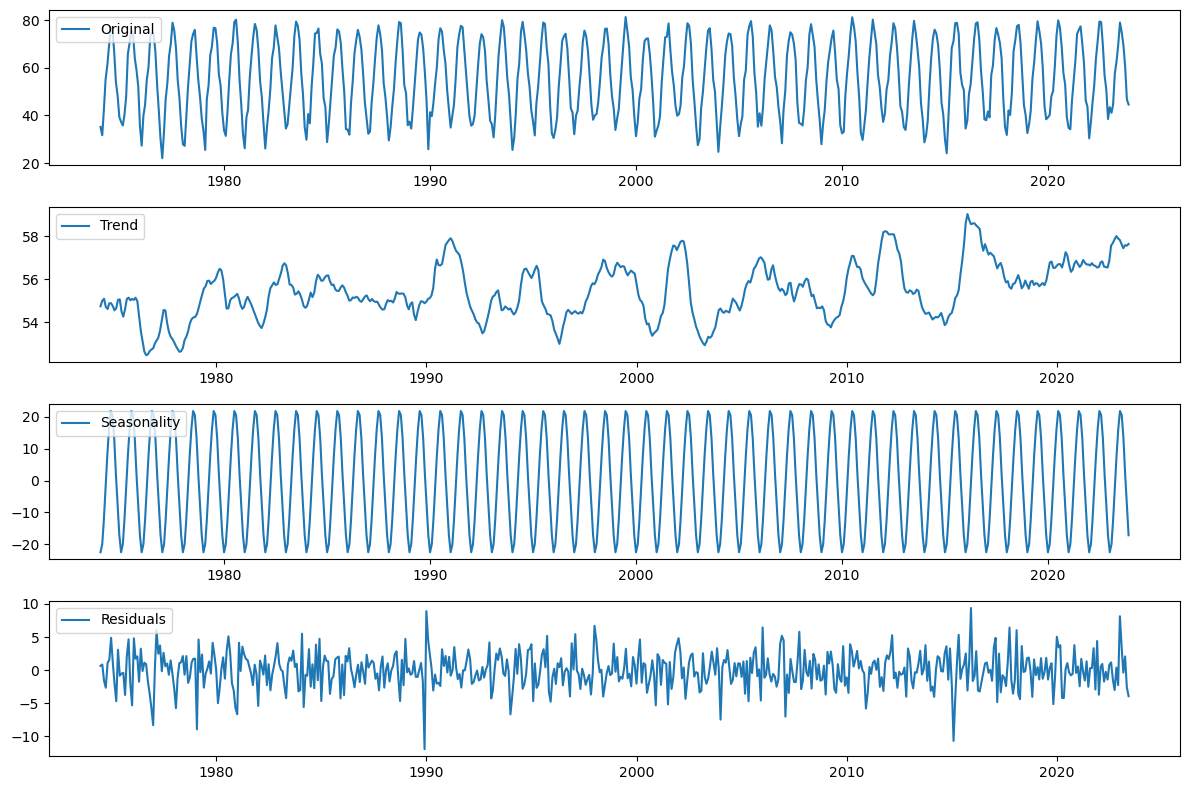

/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.64303D+00    |proj g|=  8.50502D-02

At iterate    5    f=  2.51636D+00    |proj g|=  1.65434D-02

At iterate   10    f=  2.50711D+00    |proj g|=  5.55745D-03

At iterate   15    f=  2.50593D+00    |proj g|=  1.29504D-03

At iterate   20    f=  2.50576D+00    |proj g|=  1.69160D-03

At iterate   25    f=  2.50573D+00    |proj g|=  3.36250D-04

At iterate   30    f=  2.50572D+00    |proj g|=  2.73037D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

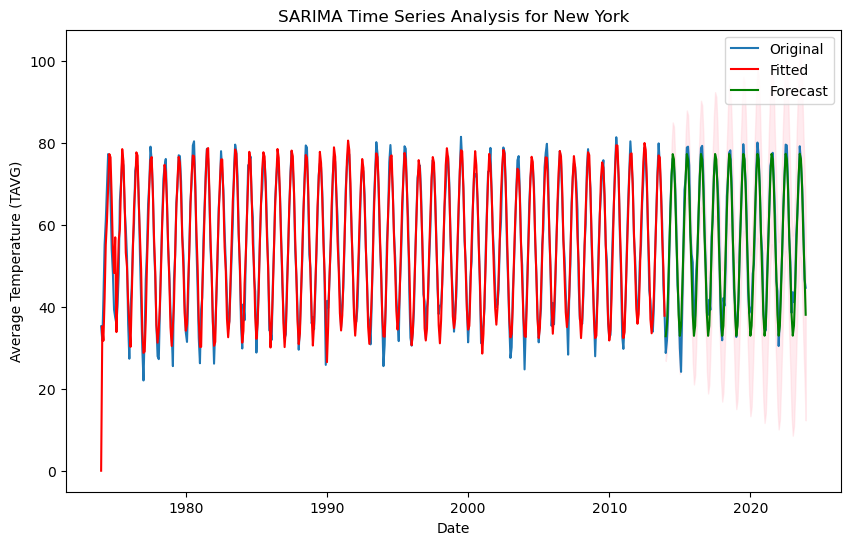

SARIMA Model Summary for New York


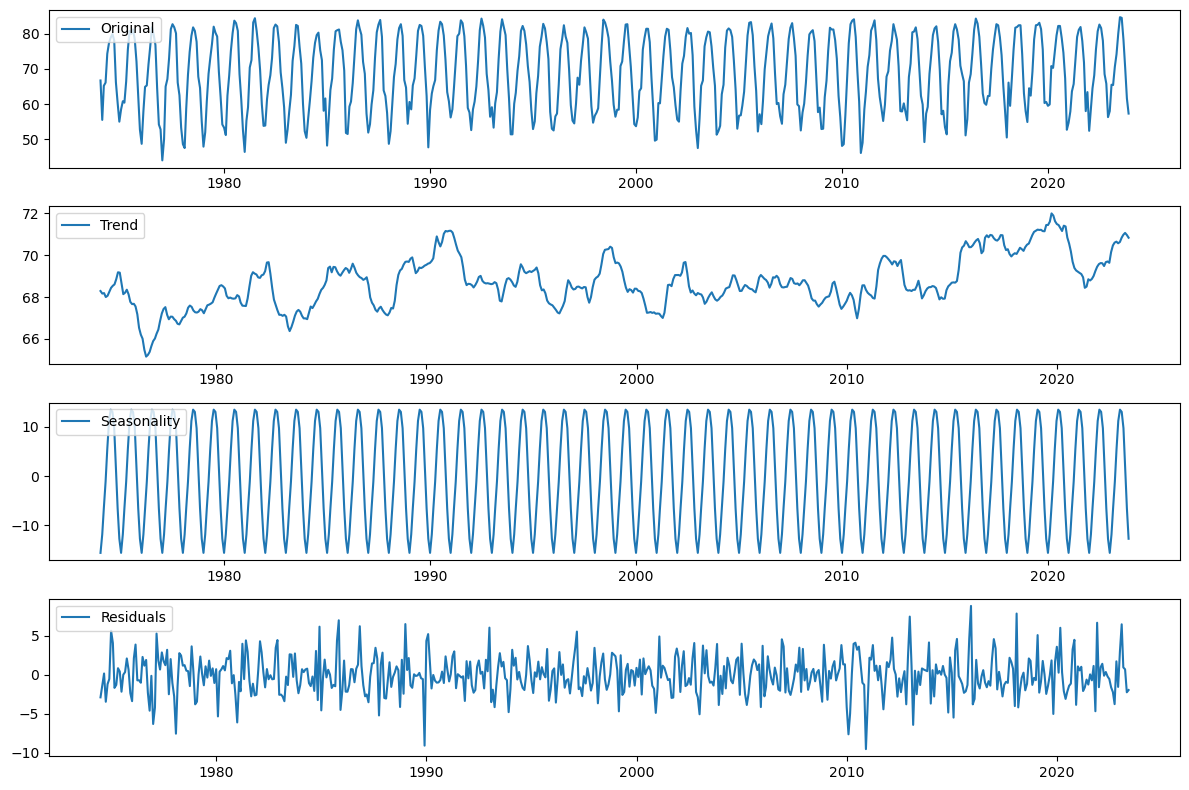

/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.55041D+00    |proj g|=  7.28784D-02

At iterate    5    f=  2.44888D+00    |proj g|=  2.26580D-02

At iterate   10    f=  2.43589D+00    |proj g|=  6.32612D-03

At iterate   15    f=  2.43452D+00    |proj g|=  1.08331D-03

At iterate   20    f=  2.43431D+00    |proj g|=  2.10503D-03

At iterate   25    f=  2.43428D+00    |proj g|=  1.90756D-04

At iterate   30    f=  2.43428D+00    |proj g|=  2.41012D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

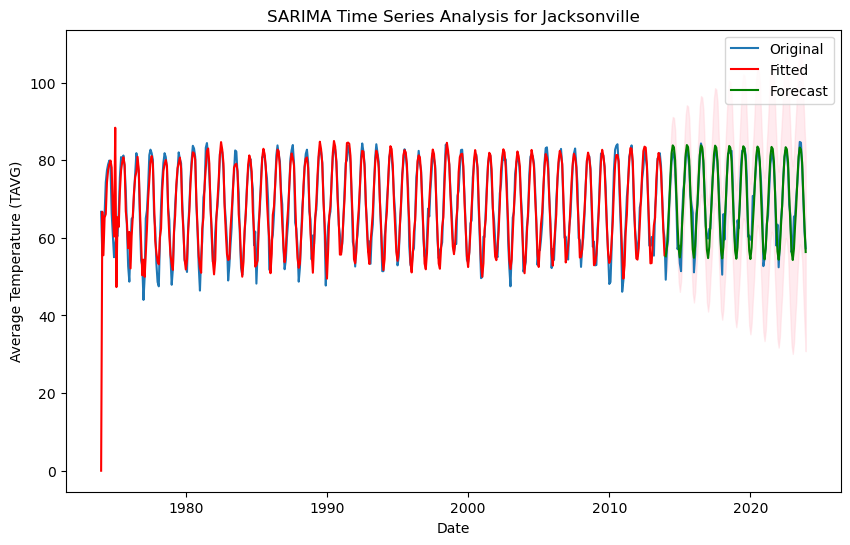

SARIMA Model Summary for Jacksonville


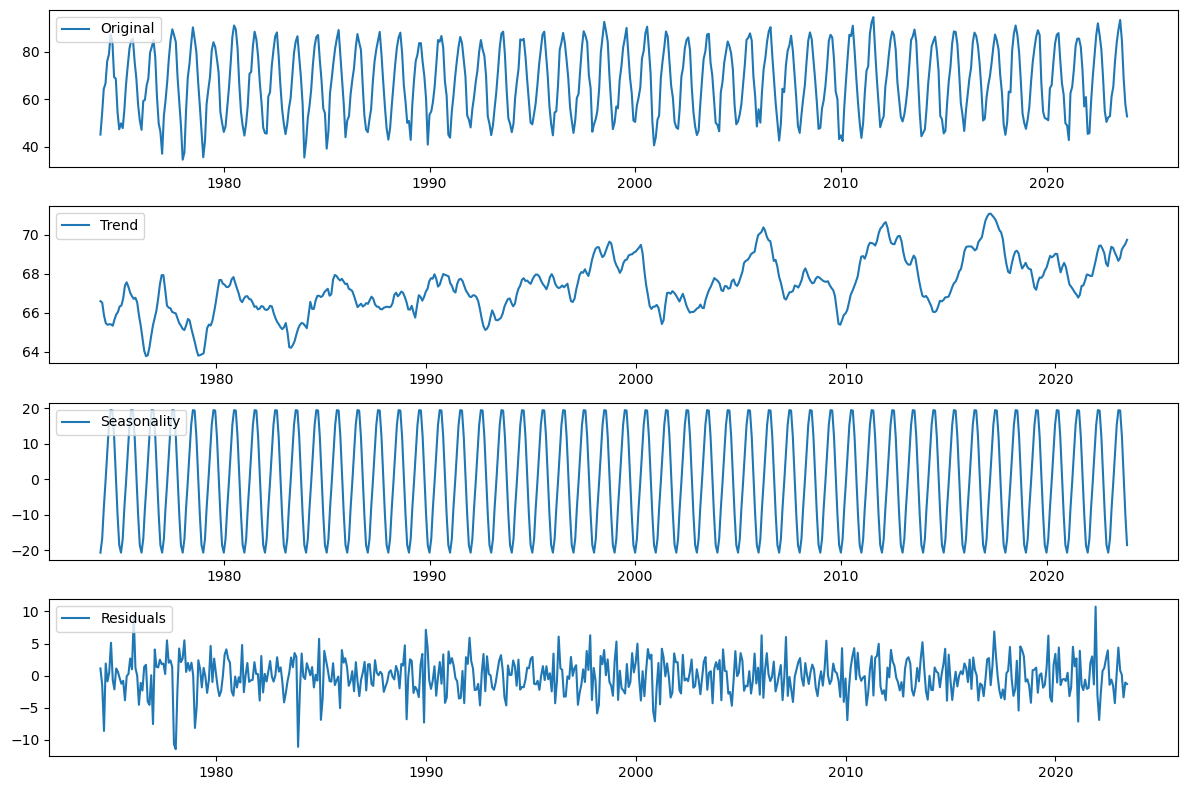

/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.67577D+00    |proj g|=  7.75953D-02

At iterate    5    f=  2.56690D+00    |proj g|=  1.82942D-02

At iterate   10    f=  2.55797D+00    |proj g|=  4.66838D-03

At iterate   15    f=  2.55733D+00    |proj g|=  4.08870D-03

At iterate   20    f=  2.55724D+00    |proj g|=  8.27497D-04

At iterate   25    f=  2.55723D+00    |proj g|=  2.78447D-04

At iterate   30    f=  2.55722D+00    |proj g|=  6.60308D-05

At iterate   35    f=  2.55722D+00    |proj g|=  1.21285D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

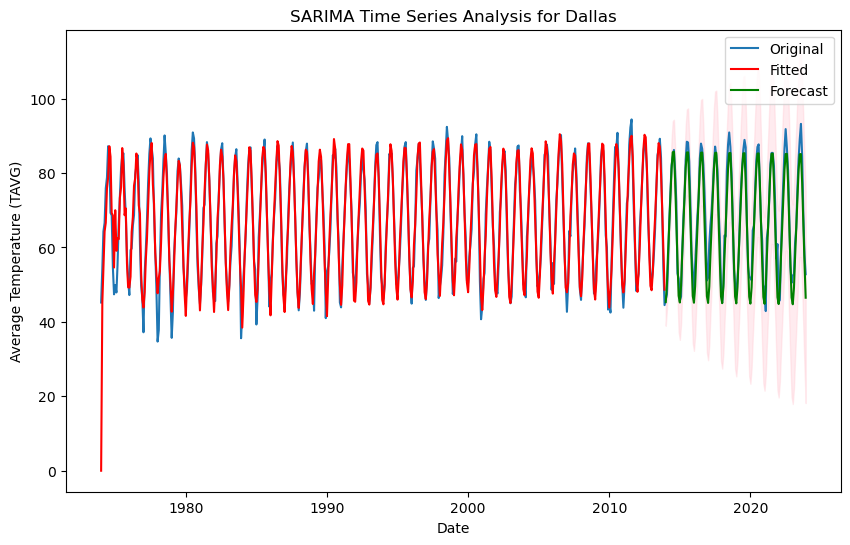

SARIMA Model Summary for Dallas


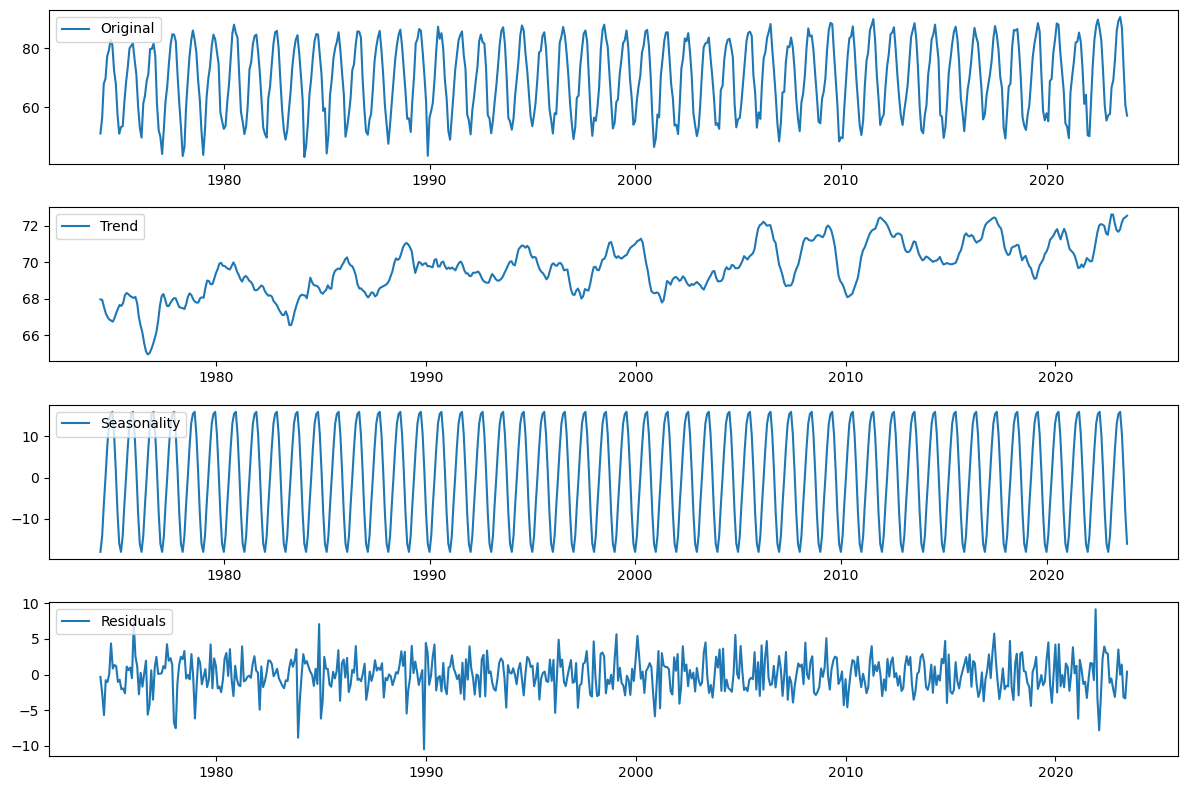

/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.52299D+00    |proj g|=  8.51601D-02

At iterate    5    f=  2.40952D+00    |proj g|=  2.67074D-02

At iterate   10    f=  2.39665D+00    |proj g|=  2.65841D-03

At iterate   15    f=  2.39593D+00    |proj g|=  3.13674D-03

At iterate   20    f=  2.39589D+00    |proj g|=  5.04498D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     24     28      1     0     0   2.175D-05   2.396D+00
  F =   2.3958895940528828     

CONVERG

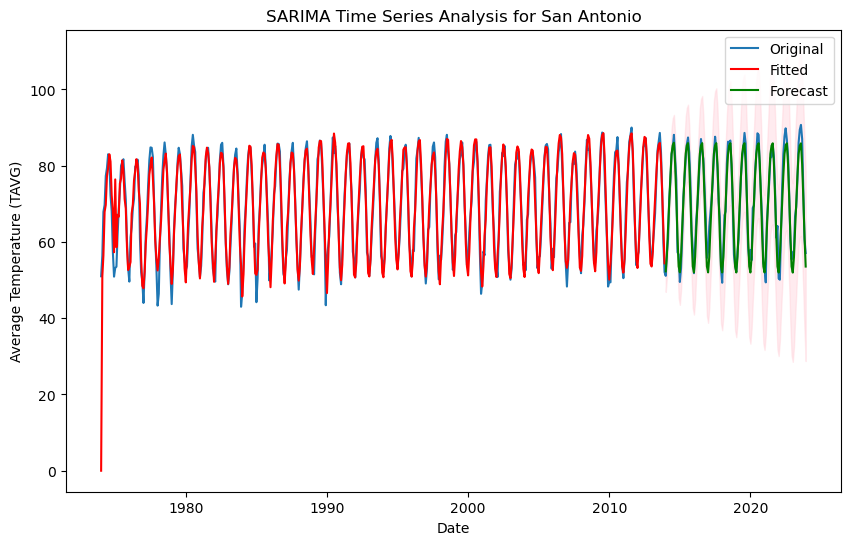

SARIMA Model Summary for San Antonio


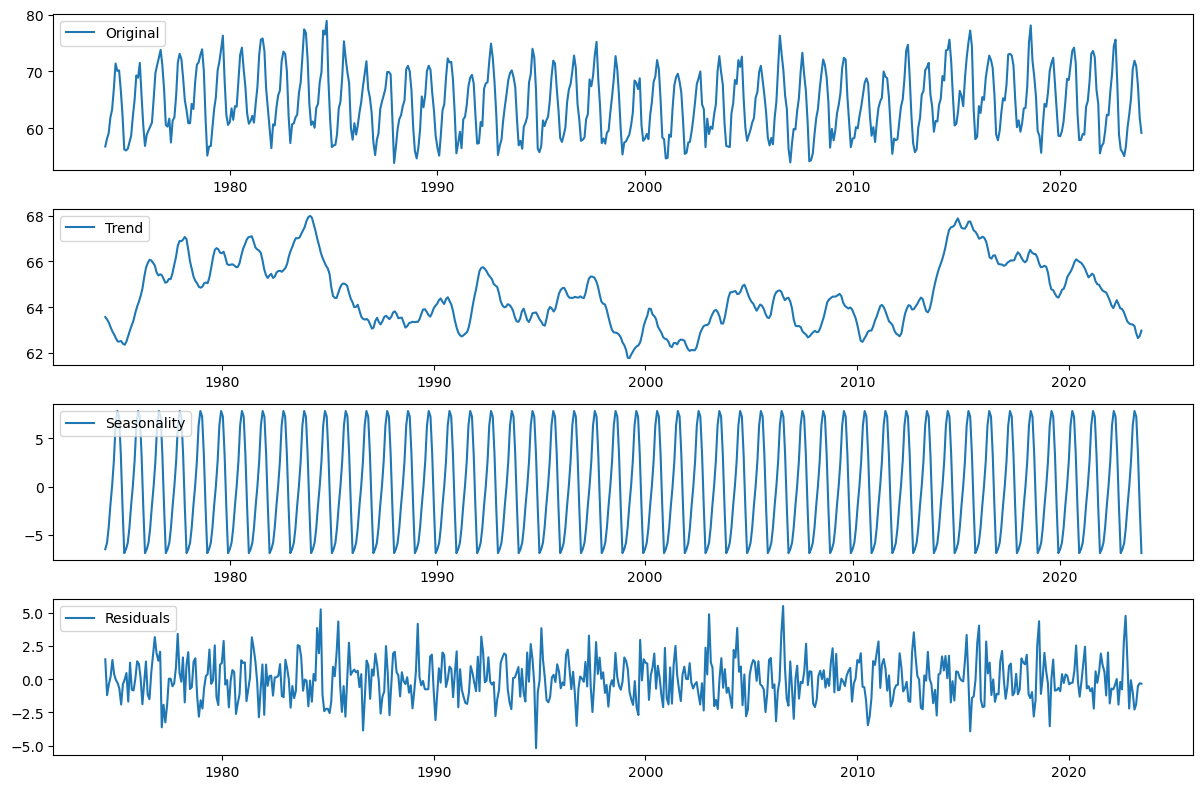

/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.07374D+00    |proj g|=  1.57389D-01

At iterate    5    f=  1.96830D+00    |proj g|=  3.40310D-02

At iterate   10    f=  1.95128D+00    |proj g|=  5.79480D-03

At iterate   15    f=  1.95058D+00    |proj g|=  5.27122D-03

At iterate   20    f=  1.95050D+00    |proj g|=  4.80662D-04

At iterate   25    f=  1.95049D+00    |proj g|=  1.36169D-04

At iterate   30    f=  1.95049D+00    |proj g|=  7.45352D-05

At iterate   35    f=  1.95049D+00    |proj g|=  1.48222D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

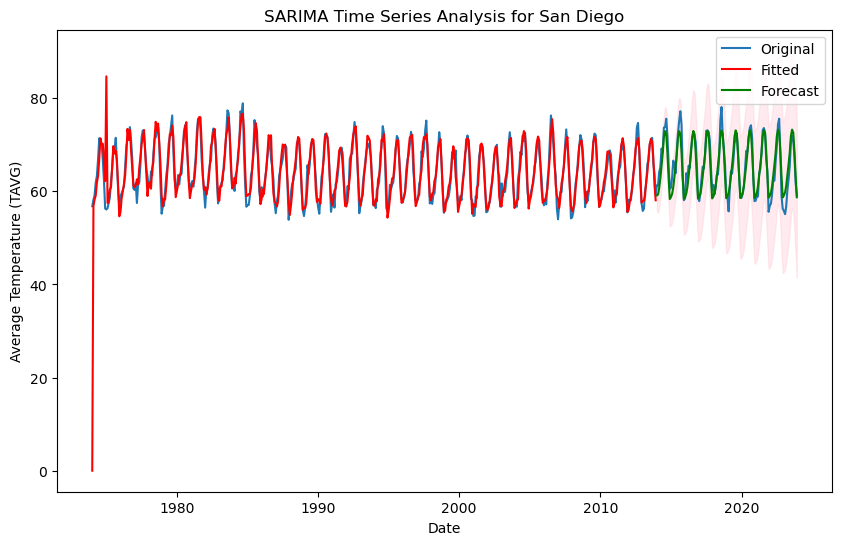

SARIMA Model Summary for San Diego


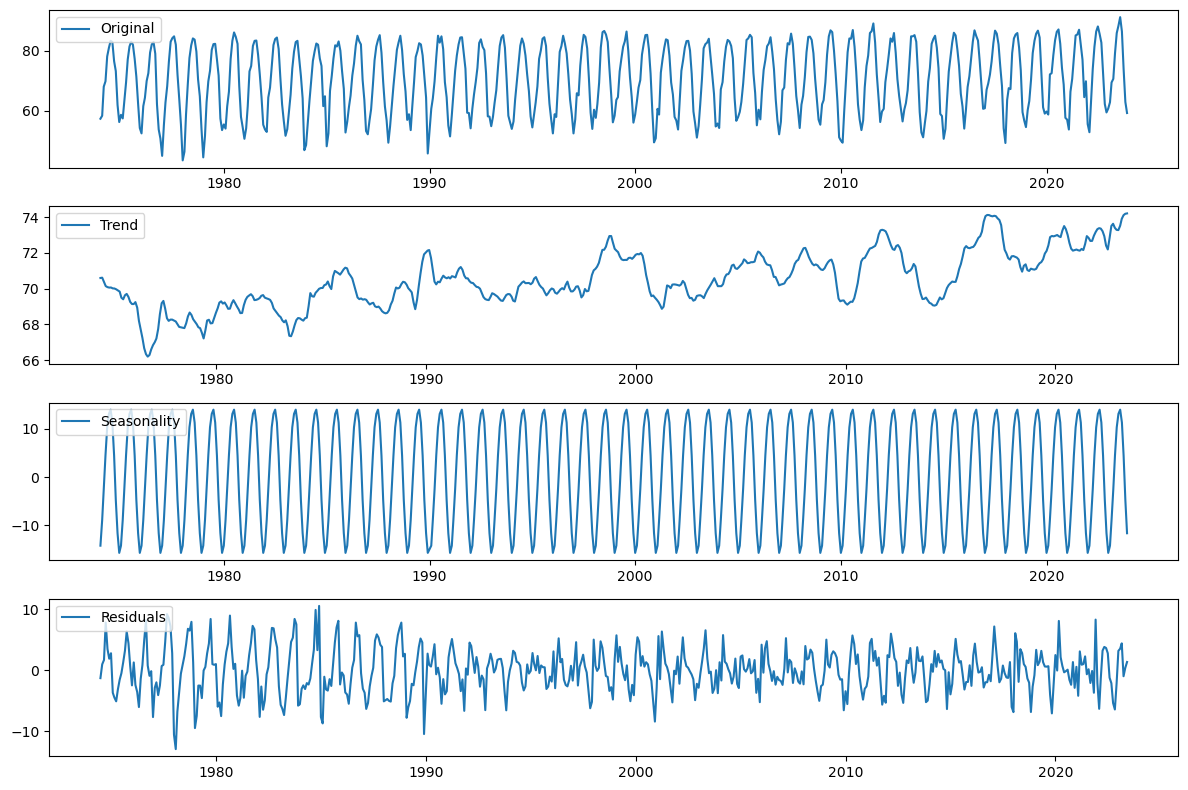

/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.56888D+00    |proj g|=  1.29325D-01

At iterate    5    f=  2.50287D+00    |proj g|=  2.91087D-02

At iterate   10    f=  2.50219D+00    |proj g|=  6.27023D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     12     16      1     0     0   9.811D-06   2.502D+00
  F =   2.5021880556820304     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


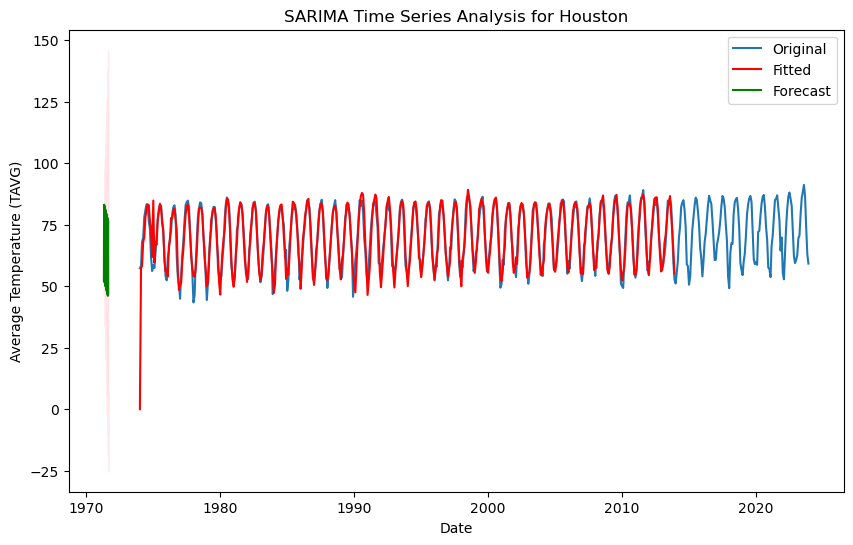

SARIMA Model Summary for Houston


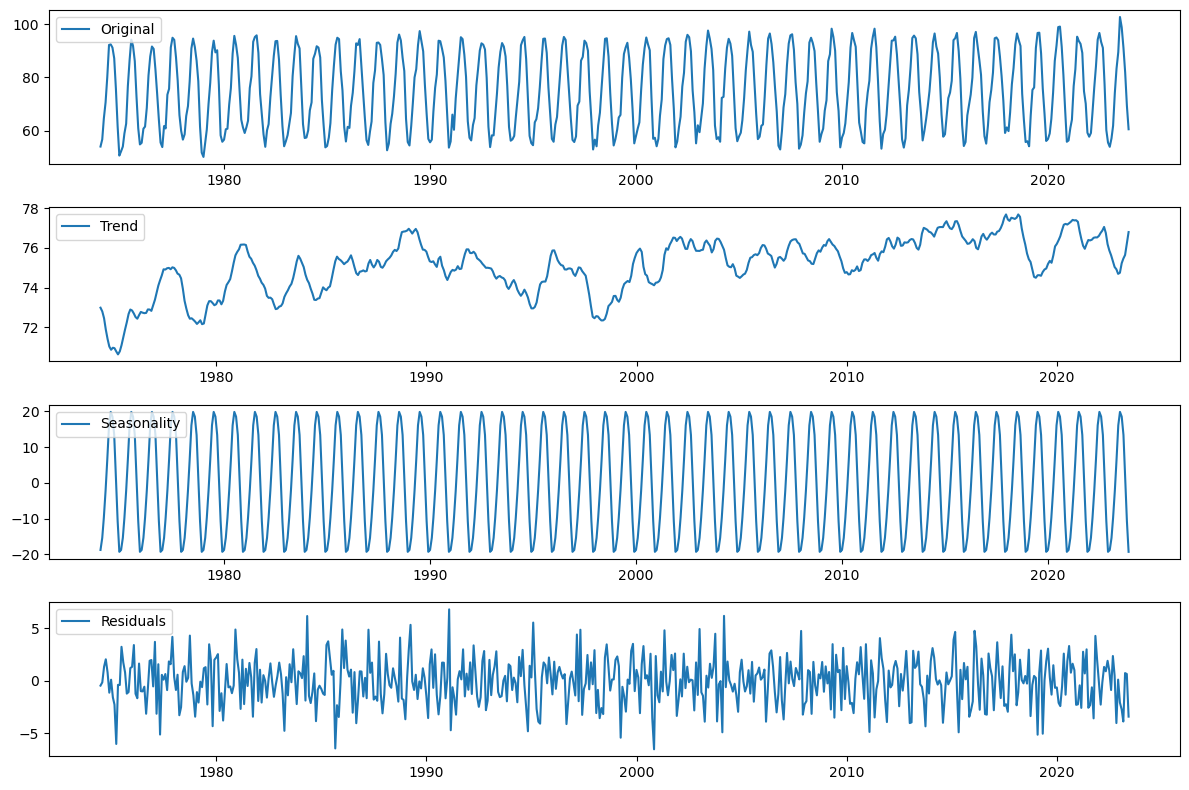

/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.44632D+00    |proj g|=  9.14378D-02

At iterate    5    f=  2.33933D+00    |proj g|=  5.00241D-02

At iterate   10    f=  2.32851D+00    |proj g|=  4.05301D-03

At iterate   15    f=  2.32795D+00    |proj g|=  1.05234D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     19     21      1     0     0   8.215D-06   2.328D+00
  F =   2.3279527637805537     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


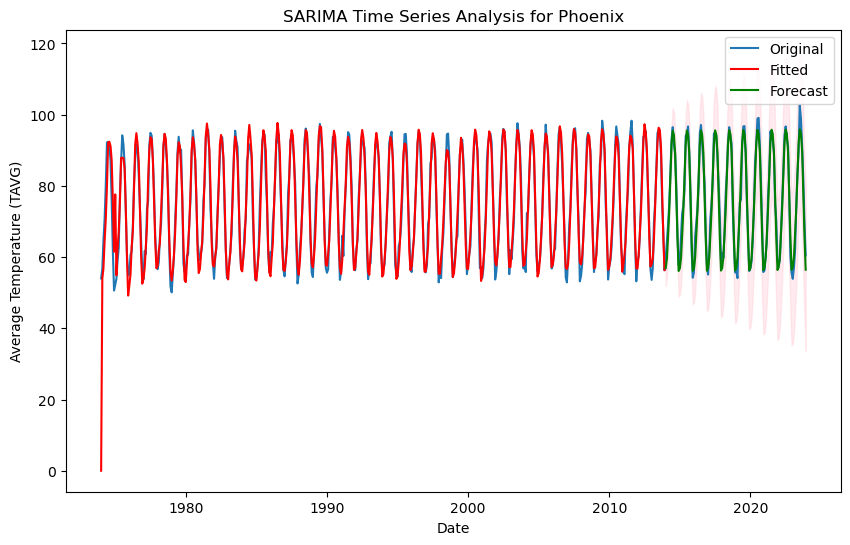

SARIMA Model Summary for Phoenix


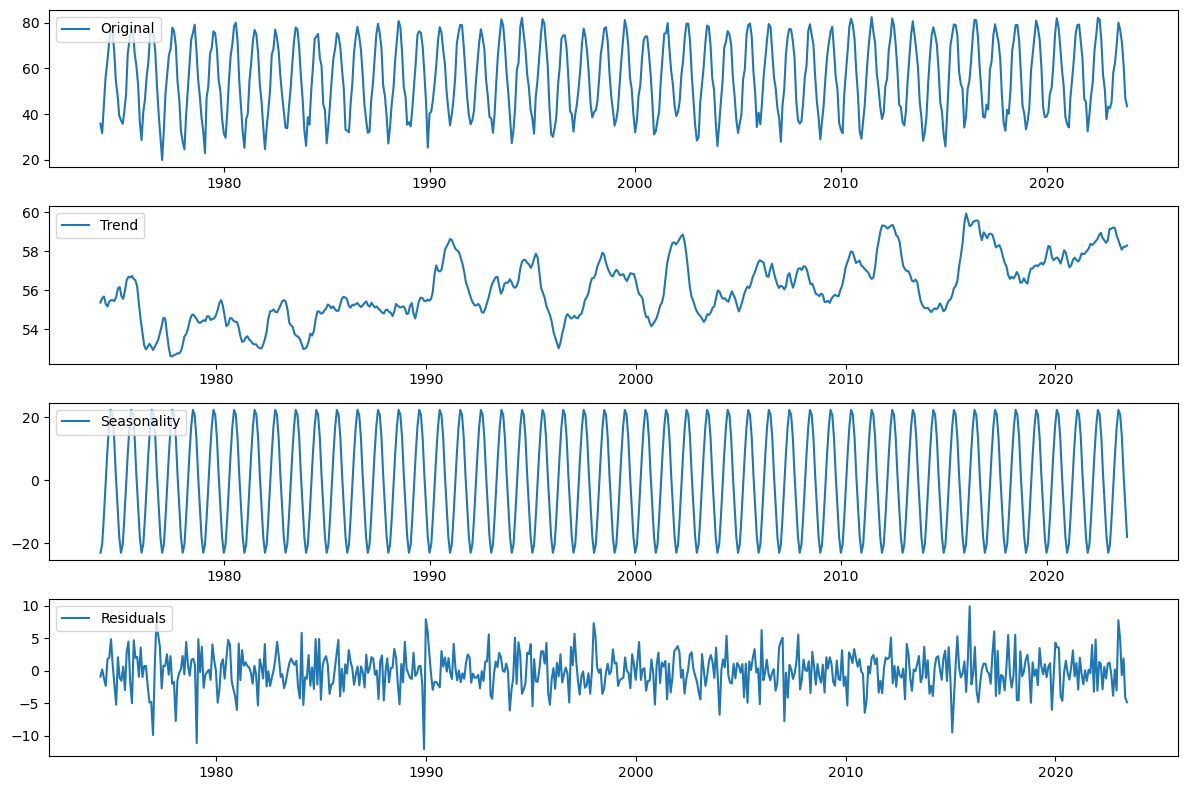

/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.68345D+00    |proj g|=  7.84162D-02

At iterate    5    f=  2.55683D+00    |proj g|=  1.70179D-02

At iterate   10    f=  2.54742D+00    |proj g|=  9.50436D-03

At iterate   15    f=  2.54640D+00    |proj g|=  3.64553D-03

At iterate   20    f=  2.54631D+00    |proj g|=  3.81847D-04

At iterate   25    f=  2.54631D+00    |proj g|=  1.89187D-04

At iterate   30    f=  2.54631D+00    |proj g|=  4.36593D-05

At iterate   35    f=  2.54631D+00    |proj g|=  1.51274D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

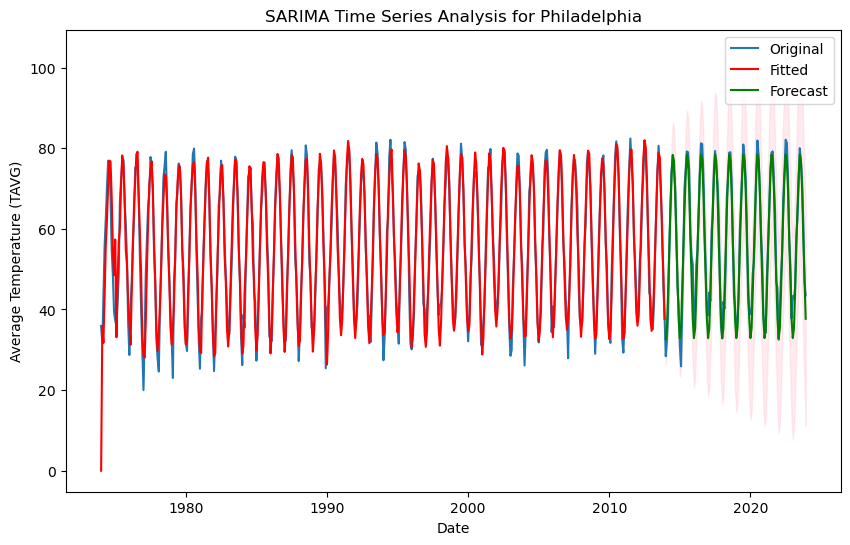

SARIMA Model Summary for Philadelphia


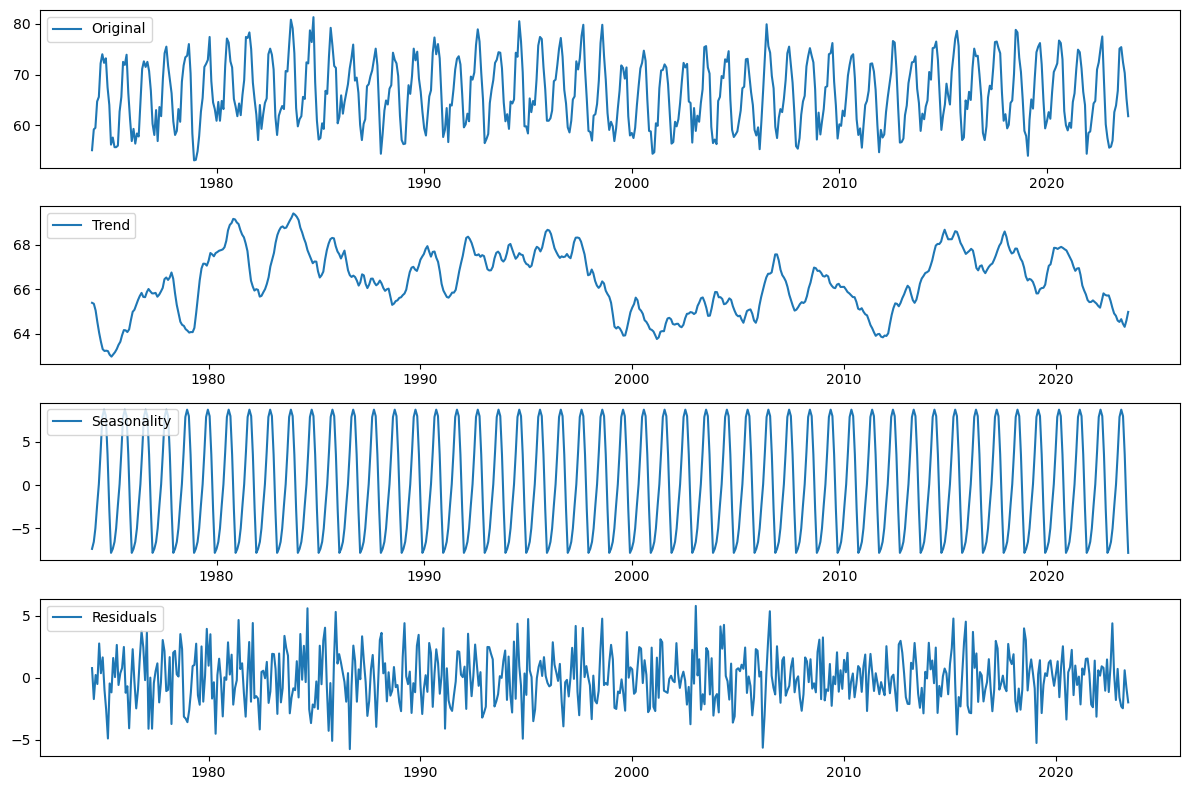

/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.38221D+00    |proj g|=  1.14491D-01

At iterate    5    f=  2.26819D+00    |proj g|=  2.89568D-02

At iterate   10    f=  2.25502D+00    |proj g|=  4.72850D-03

At iterate   15    f=  2.25453D+00    |proj g|=  4.31610D-04

At iterate   20    f=  2.25452D+00    |proj g|=  7.13696D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     20     25      1     0     0   7.137D-06   2.255D+00
  F =   2.2545222463221655     

CONVERG

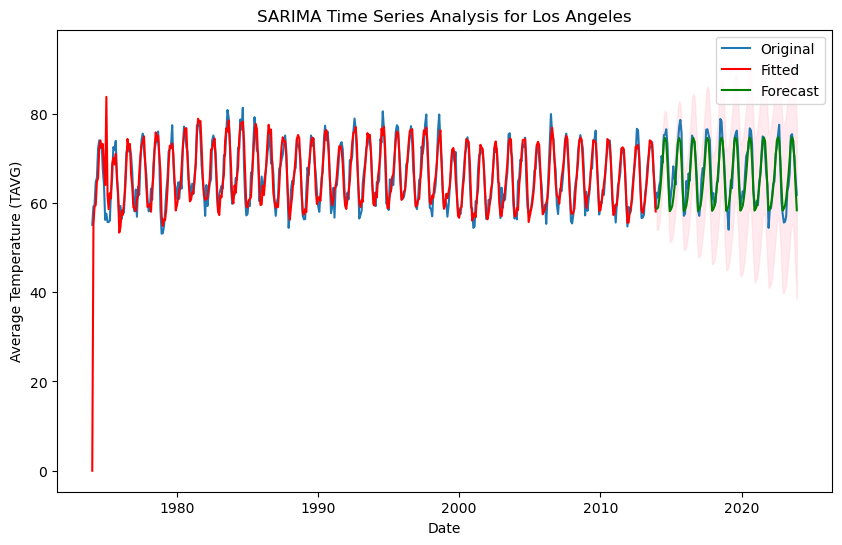

SARIMA Model Summary for Los Angeles


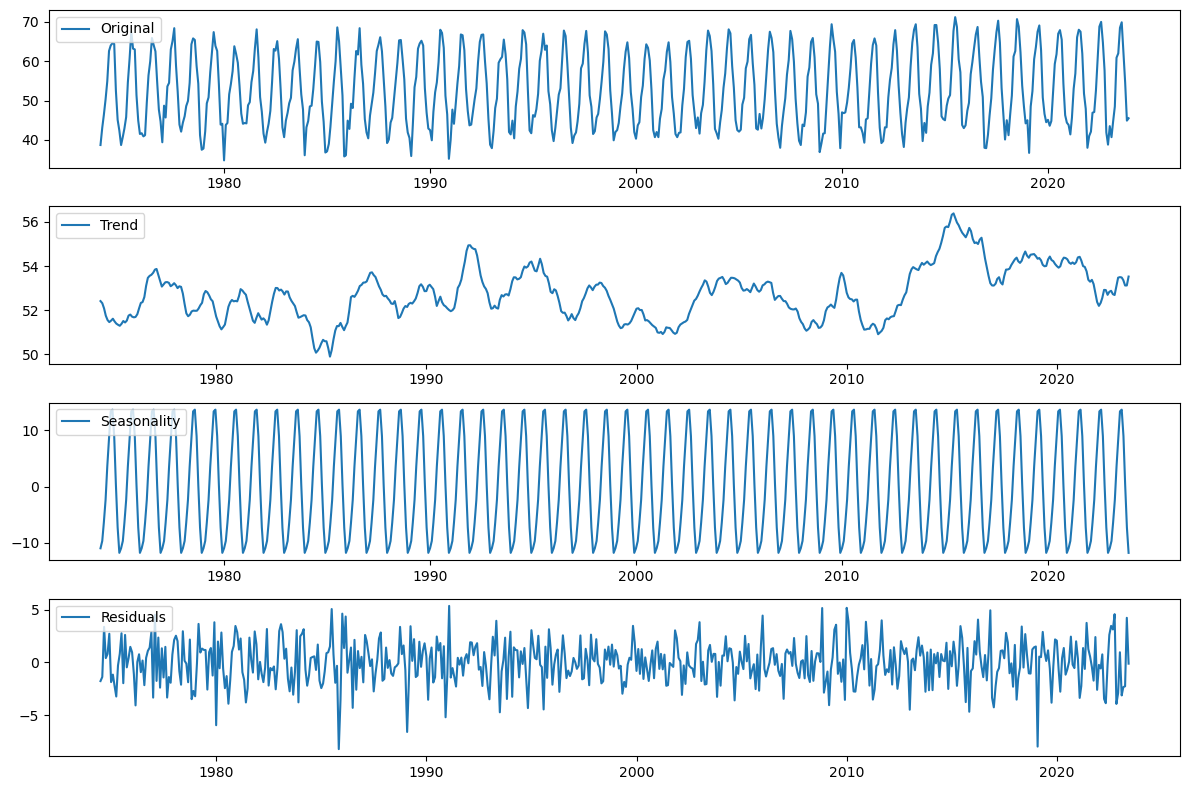

/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.35872D+00    |proj g|=  9.98890D-02

At iterate    5    f=  2.23390D+00    |proj g|=  2.58806D-02

At iterate   10    f=  2.21951D+00    |proj g|=  9.19680D-03

At iterate   15    f=  2.21870D+00    |proj g|=  1.05357D-02

At iterate   20    f=  2.21857D+00    |proj g|=  1.36313D-03

At iterate   25    f=  2.21856D+00    |proj g|=  1.06425D-04

At iterate   30    f=  2.21856D+00    |proj g|=  5.73103D-05

At iterate   35    f=  2.21856D+00    |proj g|=  1.07068D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

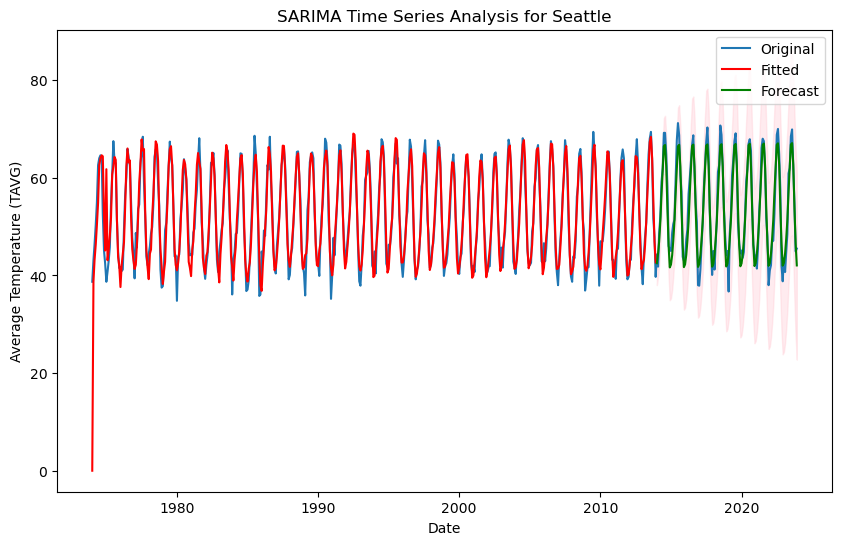

SARIMA Model Summary for Seattle


In [37]:
# Performs SARIMA analysis for each city
for city in cities:
    sarima_city(city)